In [5]:
# install.packages("C50")
# install.packages("caret")
# install.packages("ggpubr")
# install.packages("factoextra")
# install.packages("devtools")
# install.packages("outliers")

# install.packages("smotefamily")

In [6]:
library ( C50         )
library ( caret       )
library ( ggpubr      )
library ( devtools    )
library ( outliers    )
library ( smotefamily )


library (  factoextra    )
# install_github("vqv/ggbiplot")
library (  ggbiplot      )
library(readr)


Cargando paquete requerido: ggplot2

Cargando paquete requerido: lattice

Cargando paquete requerido: usethis

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [7]:
df <- read_delim("./dsY1.csv", delim = ',')

Rows: 768 Columns: 6
-- Column specification --------------------------------------------------------
Delimiter: ","
chr (6): X1, X2, X3, X4, X5, Y1

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
head( df, 3 )

X1,X2,X3,X4,X5,Y1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Muy alto,Bajo,Muy alto,Muy bajo,Moderadamente bajo,HL2
Muy alto,Bajo,Muy alto,Bajo,Moderadamente bajo,HL2
Muy alto,Bajo,Muy alto,Medio,Moderadamente bajo,HL2


In [9]:
# Convertir las columnas a factores
sm_reduced <- as.data.frame(lapply(df, function(x) {
  if (is.character(x)) as.factor(x) else x
}))

In [10]:
head( sm_reduced, 3 )

,X1,X2,X3,X4,X5,Y1
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Muy alto,Bajo,Muy alto,Muy bajo,Moderadamente bajo,HL2
2,Muy alto,Bajo,Muy alto,Bajo,Moderadamente bajo,HL2
3,Muy alto,Bajo,Muy alto,Medio,Moderadamente bajo,HL2


In [11]:
levels_y1 <- levels(sm_reduced$Y1)

# Resumen de datos
for (level in levels_y1) {
  cat(paste0("=== Resumen de datos para ", level, " ===\n"))
  print(summary(sm_reduced[sm_reduced$Y1 == level,]))
  cat("\n")
}


=== Resumen de datos para HL1 ===
        X1            X2           X3            X4                     X5    
 Muy alto: 0   Alto    :4   Alto    : 0   Alto    :5   Alto              : 0  
 Muy bajo:20   Bajo    :4   Bajo    : 0   Bajo    :5   Bajo              : 0  
               Medio   :4   Medio   : 0   Medio   :5   Moderadamente alto: 0  
               Muy alto:0   Muy alto:20   Muy bajo:5   Moderadamente bajo:20  
               Muy bajo:8   Muy bajo: 0                Muy alto          : 0  
                                                       Muy bajo          : 0  
   Y1    
 HL1:20  
 HL2: 0  
 HL3: 0  
 HL4: 0  
 HL5: 0  
         

=== Resumen de datos para HL2 ===
        X1             X2             X3             X4    
 Muy alto: 13   Alto    : 60   Alto    : 48   Alto    :95  
 Muy bajo:364   Bajo    : 69   Bajo    :144   Bajo    :94  
                Medio   :128   Medio   : 96   Medio   :94  
                Muy alto:  0   Muy alto: 17   Muy bajo:94  
        

# 3. Generación de modelo

In [12]:
set.seed( 1237 )

sm_indexes   <- createDataPartition( sm_reduced$Y1, p=0.80, list = F )
sm_train.set_reduced <- sm_reduced[sm_indexes,]
sm_test.set_reduced  <- sm_reduced[-sm_indexes,]

In [13]:
prop.table(table(sm_train.set_reduced$Y1))


       HL1        HL2        HL3        HL4        HL5 
0.02597403 0.49025974 0.22077922 0.21753247 0.04545455 

In [14]:
prop.table(table(sm_test.set_reduced$Y1))


       HL1        HL2        HL3        HL4        HL5 
0.02631579 0.49342105 0.21710526 0.21710526 0.04605263 

In [15]:
dim( sm_train.set_reduced )
head( sm_train.set_reduced, 3 )

[1] 616   6

,X1,X2,X3,X4,X5,Y1
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,Muy alto,Bajo,Muy alto,Muy bajo,Moderadamente bajo,HL2
3,Muy alto,Bajo,Muy alto,Medio,Moderadamente bajo,HL2
5,Muy alto,Bajo,Muy alto,Muy bajo,Moderadamente bajo,HL3


In [16]:
dim( sm_test.set_reduced )
head( sm_test.set_reduced, 3 )

[1] 152   6

,X1,X2,X3,X4,X5,Y1
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,Muy alto,Bajo,Muy alto,Bajo,Moderadamente bajo,HL2
4,Muy alto,Bajo,Muy alto,Alto,Moderadamente bajo,HL2
9,Muy alto,Bajo,Muy alto,Muy bajo,Moderadamente bajo,HL2


## Modelo

In [17]:
#Modelo de clasificación con instancia de entrenamiento
sm.tree_reduced <- C5.0( Y1 ~ ., sm_train.set_reduced ) 

#Modelo basado en reglas
tree.rules_reduced <- C5.0( x = sm_train.set_reduced[, -ncol(sm_train.set_reduced) ], y = sm_train.set_reduced$Y1, rules = T )


In [18]:
summary(sm.tree_reduced )


Call:
C5.0.formula(formula = Y1 ~ ., data = sm_train.set_reduced)


C5.0 [Release 2.07 GPL Edition]  	Thu Jun 20 00:39:05 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Decision tree:

X1 = Muy bajo:
:...X3 in {Alto,Bajo,Medio,Muy bajo}: HL2 (291)
:   X3 = Muy alto: HL1 (19/3)
X1 = Muy alto:
:...X2 in {Alto,Muy bajo}: HL4 (0)
    X2 = Muy alto:
    :...X5 in {Alto,Bajo,Moderadamente alto,Muy alto}: HL4 (35)
    :   X5 in {Moderadamente bajo,Muy bajo}:
    :   :...X3 in {Alto,Medio}: HL4 (8)
    :       X3 in {Bajo,Muy bajo}: HL5 (10/1)
    :       X3 = Muy alto: HL3 (3)
    X2 in {Bajo,Medio}:
    :...X2 = Medio: HL3 (101/49)
        X2 = Bajo:
        :...X3 in {Alto,Medio}: HL3 (60/8)
            X3 = Muy alto: HL2 (9/3)
            X3 in {Bajo,Muy bajo}:
            :...X5 in {Alto,Muy alto}: HL3 (18/2)
                X5 in {Bajo,Moderadamente alto,Moderadamente bajo,
                       Muy bajo}

In [19]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [20]:
head( tree.pred.prob_reduced, 3 )

,HL1,HL2,HL3,HL4,HL5
2,0.002597403,0.649026,0.3220779,0.02175325,0.004545455
4,0.002597403,0.649026,0.3220779,0.02175325,0.004545455
9,0.002597403,0.649026,0.3220779,0.02175325,0.004545455


In [21]:
tree.pred.class_reduced

[1] HL2 HL2 HL2 HL3 HL3 HL3 HL1 HL1 HL1 HL1 HL1 HL3 HL3 HL2 HL2 HL2 HL2 HL2
 [19] HL3 HL3 HL3 HL3 HL3 HL3 HL3 HL4 HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL3 HL4
 [37] HL4 HL2 HL2 HL2 HL2 HL3 HL3 HL2 HL2 HL2 HL2 HL3 HL3 HL3 HL3 HL3 HL3 HL3
 [55] HL2 HL2 HL2 HL2 HL2 HL2 HL3 HL3 HL3 HL2 HL2 HL2 HL2 HL3 HL3 HL3 HL3 HL2
 [73] HL4 HL4 HL4 HL3 HL4 HL2 HL2 HL2 HL2 HL4 HL4 HL4 HL4 HL3 HL4 HL2 HL2 HL2
 [91] HL3 HL3 HL3 HL3 HL3 HL2 HL2 HL2 HL2 HL2 HL4 HL3 HL3 HL5 HL2 HL4 HL4 HL4
[109] HL4 HL4 HL3 HL5 HL2 HL2 HL2 HL2 HL2 HL2 HL4 HL4 HL4 HL4 HL4 HL4 HL3 HL3
[127] HL2 HL2 HL2 HL2 HL2 HL2 HL2 HL2 HL4 HL3 HL2 HL2 HL2 HL2 HL2 HL4 HL4 HL3
[145] HL3 HL2 HL2 HL2 HL2 HL2 HL2 HL2
Levels: HL1 HL2 HL3 HL4 HL5

In [22]:
dev.new( width=10, height=10 )

In [23]:
sm.tree_reduced


Call:
C5.0.formula(formula = Y1 ~ ., data = sm_train.set_reduced)

Classification Tree
Number of samples: 616 
Number of predictors: 5 

Tree size: 12 

Non-standard options: attempt to group attributes


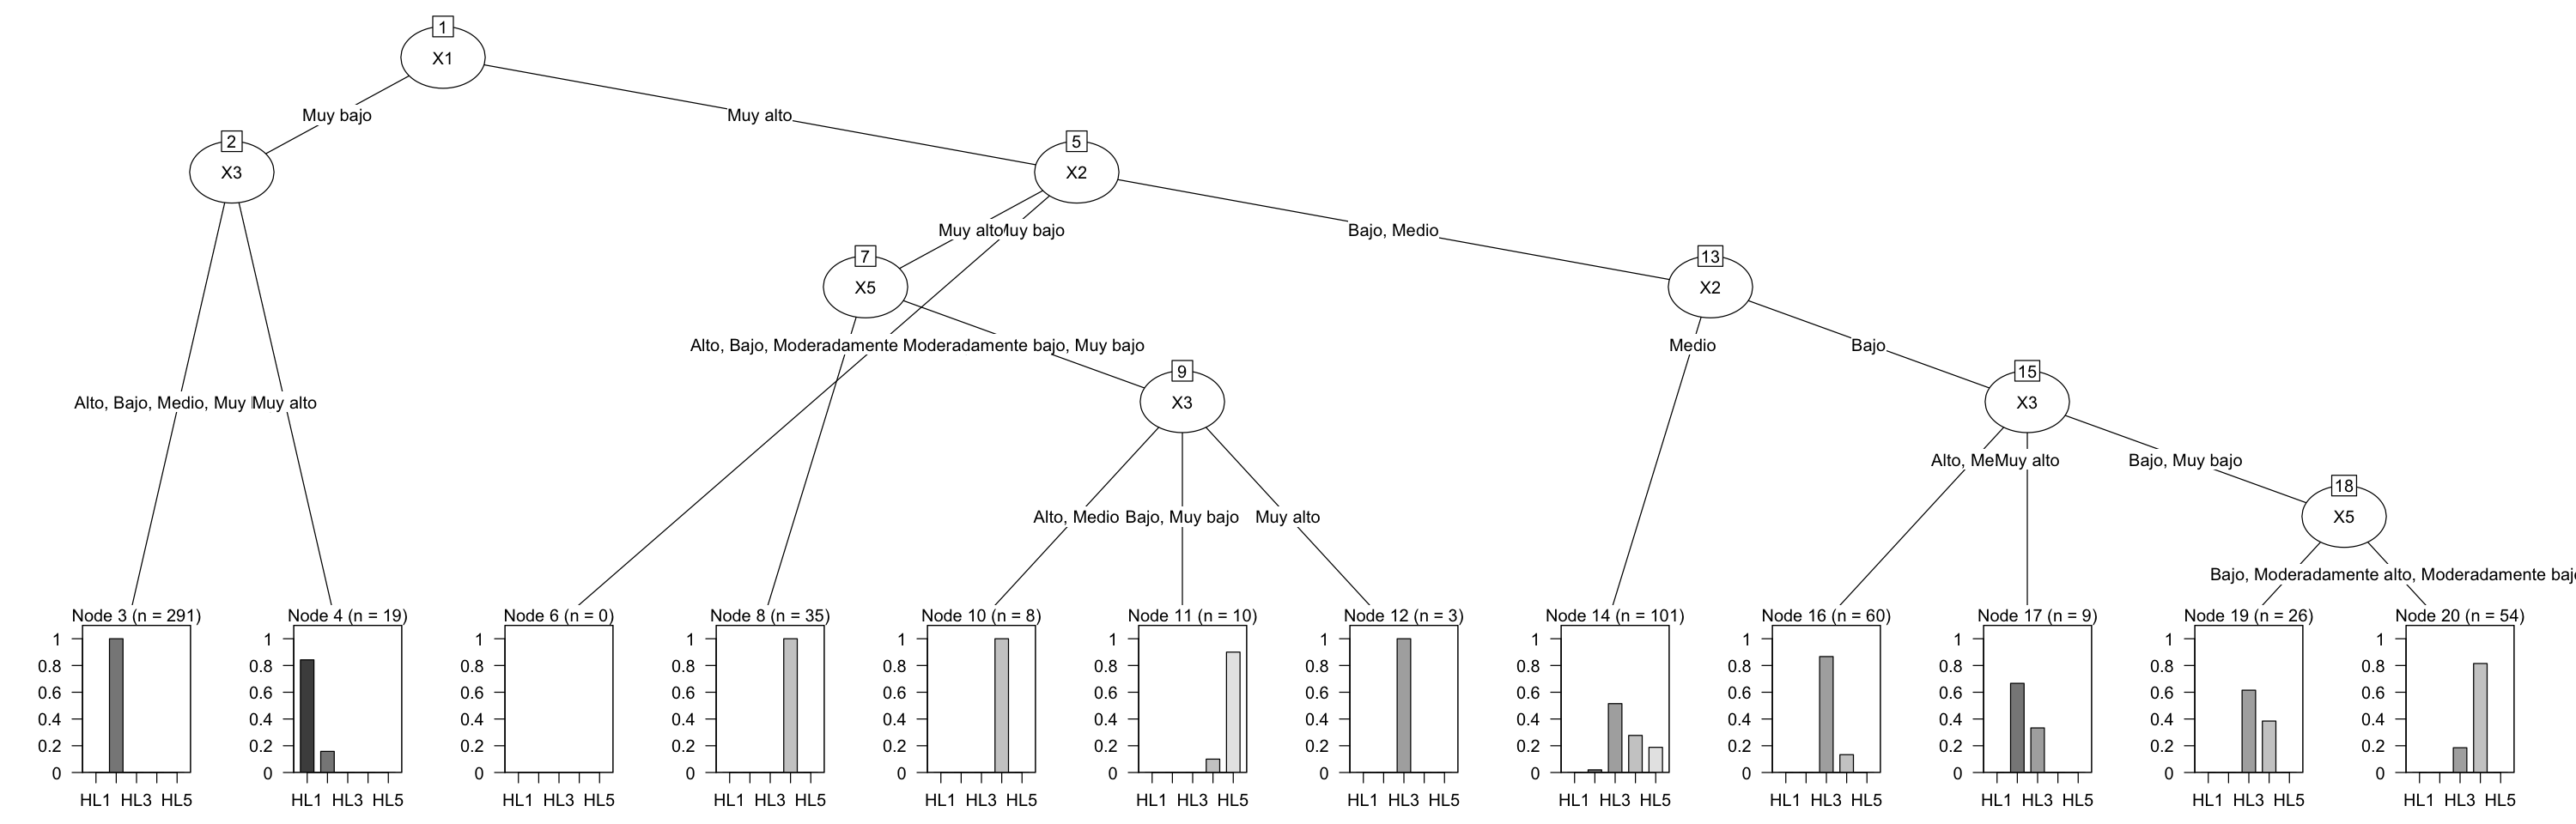

In [24]:
options(repr.plot.width=25, repr.plot.height=8)
plot( sm.tree_reduced )

In [25]:
summary( tree.rules_reduced )


Call:
C5.0.default(x = sm_train.set_reduced[, -ncol(sm_train.set_reduced)], y
 = sm_train.set_reduced$Y1, rules = T)


C5.0 [Release 2.07 GPL Edition]  	Thu Jun 20 00:39:05 2024
-------------------------------

Class specified by attribute `outcome'

Read 616 cases (6 attributes) from undefined.data

Rules:

Rule 1: (19/3, lift 31.2)
	X1 = Muy bajo
	X3 = Muy alto
	->  class HL1  [0.810]

Rule 2: (291, lift 2.0)
	X1 = Muy bajo
	X3 in {Alto, Bajo, Medio, Muy bajo}
	->  class HL2  [0.997]

Rule 3: (306/170, lift 2.0)
	X1 = Muy alto
	->  class HL3  [0.445]

Rule 4: (35, lift 4.5)
	X2 = Muy alto
	X5 in {Alto, Bajo, Moderadamente alto, Muy alto}
	->  class HL4  [0.973]

Rule 5: (21, lift 4.4)
	X2 = Muy alto
	X3 in {Alto, Medio}
	->  class HL4  [0.957]

Rule 6: (62/10, lift 3.8)
	X1 = Muy alto
	X2 = Bajo
	X3 in {Bajo, Muy bajo}
	X5 in {Bajo, Moderadamente alto, Moderadamente bajo, Muy bajo}
	->  class HL4  [0.828]

Rule 7: (10/1, lift 18.3)
	X2 = Muy alto
	X3 in {Bajo, Muy bajo}
	X5 in {Mode

In [26]:
conf.matrix.tree_reduced <- confusionMatrix(table( sm_test.set_reduced$Y1, tree.pred.class_reduced ))
print( conf.matrix.tree_reduced )

Confusion Matrix and Statistics

     tree.pred.class_reduced
      HL1 HL2 HL3 HL4 HL5
  HL1   4   0   0   0   0
  HL2   1  72   2   0   0
  HL3   0   0  27   6   0
  HL4   0   0  12  21   0
  HL5   0   0   5   0   2

Overall Statistics
                                          
               Accuracy : 0.8289          
                 95% CI : (0.7595, 0.8851)
    No Information Rate : 0.4737          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.741           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: HL1 Class: HL2 Class: HL3 Class: HL4 Class: HL5
Sensitivity             0.80000     1.0000     0.5870     0.7778    1.00000
Specificity             1.00000     0.9625     0.9434     0.9040    0.96667
Pos Pred Value          1.00000     0.9600     0.8182     0.6364    0.28571
Neg Pred Value          0.99324     1.0000     0

## Boosting

In [27]:
sm.tree_reduced <- C5.0(Y1 ~ ., data = sm_train.set_reduced, trials = 10)


In [28]:
any(is.na(sm_test.set_reduced))

sm_test.set_reduced <- na.omit(sm_test.set_reduced)


[1] FALSE

In [29]:
# Predicción de clases con instancia de pruebas
tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

# Probabilidad por clases
tree.pred.prob_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "prob")


In [30]:
library(caret)
confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1, positive = "yes")


Confusion Matrix and Statistics

          Reference
Prediction HL1 HL2 HL3 HL4 HL5
       HL1   4   1   0   0   0
       HL2   0  72   0   0   0
       HL3   0   2  13   4   1
       HL4   0   0  18  28   3
       HL5   0   0   2   1   3

Overall Statistics
                                         
               Accuracy : 0.7895         
                 95% CI : (0.716, 0.8513)
    No Information Rate : 0.4934         
    P-Value [Acc > NIR] : 5.425e-14      
                                         
                  Kappa : 0.6834         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: HL1 Class: HL2 Class: HL3 Class: HL4 Class: HL5
Sensitivity             1.00000     0.9600    0.39394     0.8485    0.42857
Specificity             0.99324     1.0000    0.94118     0.8235    0.97931
Pos Pred Value          0.80000     1.0000    0.65000     0.5714    0.50000
Neg Pred Value          1.00000     

In [31]:
modeloc50_1 <- C5.0(data_training[-17], data_training$default, trials = 10) 
data_predicted2 <- predict(modeloc50_1, data_test)
confusionMatrix(data = data_predicted2, reference = data_test$default, positive = "yes")

ERROR: Error in eval(expr, envir, enclos): objeto 'data_training' no encontrado


In [ ]:
accuracy_results <- data.frame(Trials = integer(), Accuracy = double())

for (trials in c(1, 5, 10, 20, 50, 100)) {
  sm.tree_reduced <- C5.0(Y1 ~ ., data = sm_train.set_reduced, trials = trials)
  tree.pred.class_reduced <- predict(sm.tree_reduced, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")
  
  cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1, positive = "yes")
  
  accuracy_results <- rbind(accuracy_results, data.frame(Trials = trials, Accuracy = cm$overall["Accuracy"]))
}

print(accuracy_results)

          Trials  Accuracy
Accuracy       1 0.8289474
Accuracy1      5 0.8223684
Accuracy2     10 0.7894737
Accuracy3     20 0.8421053
Accuracy4     50 0.7828947
Accuracy5    100 0.7828947


In [ ]:
train_control <- trainControl(method = "cv", number = 10)

tuned_model <- train(
  Y1 ~ ., 
  data = sm_train.set_reduced, 
  method = "C5.0",
  trControl = train_control,
  tuneGrid = expand.grid(trials = c(1, 5, 10, 20, 50, 100), model = "tree", winnow = FALSE)
)

print(tuned_model$bestTune)

best_model <- C5.0(Y1 ~ ., data = sm_train.set_reduced, trials = tuned_model$bestTune$trials)
tree.pred.class_reduced <- predict(best_model, sm_test.set_reduced[, -ncol(sm_test.set_reduced)], type = "class")

cm <- confusionMatrix(data = tree.pred.class_reduced, reference = sm_test.set_reduced$Y1, positive = "yes")
print(cm)

Warning message:
"'trials' should be <= 36 for this object. Predictions generated using 36 trials"
Warning message:
"'trials' should be <= 26 for this object. Predictions generated using 26 trials"
Warning message:
"'trials' should be <= 33 for this object. Predictions generated using 33 trials"
Warning message:
"'trials' should be <= 28 for this object. Predictions generated using 28 trials"
Warning message:
"'trials' should be <= 33 for this object. Predictions generated using 33 trials"
Warning message:
"'trials' should be <= 24 for this object. Predictions generated using 24 trials"
Warning message:
"'trials' should be <= 34 for this object. Predictions generated using 34 trials"
Warning message:
"'trials' should be <= 30 for this object. Predictions generated using 30 trials"


  trials model winnow
1      1  tree  FALSE
Confusion Matrix and Statistics

          Reference
Prediction HL1 HL2 HL3 HL4 HL5
       HL1   4   1   0   0   0
       HL2   0  72   0   0   0
       HL3   0   2  27  12   5
       HL4   0   0   6  21   0
       HL5   0   0   0   0   2

Overall Statistics
                                          
               Accuracy : 0.8289          
                 95% CI : (0.7595, 0.8851)
    No Information Rate : 0.4934          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.741           
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: HL1 Class: HL2 Class: HL3 Class: HL4 Class: HL5
Sensitivity             1.00000     0.9600     0.8182     0.6364    0.28571
Specificity             0.99324     1.0000     0.8403     0.9496    1.00000
Pos Pred Value          0.80000     1.0000     0.5870     0

# Reglas

In [35]:
library(arules)

Cargando paquete requerido: Matrix


Adjuntando el paquete: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write




In [44]:
rules <- tree.rules_reduced$output

# Procesar la salida de las reglas para formatearlas
rules_list <- strsplit(rules, split = "\n")
rules_cleaned <- lapply(rules_list, function(x) {
  x <- trimws(x)
  x <- x[x != ""]
  return(x)
})
rules_df <- do.call(rbind, lapply(rules_cleaned, function(x) {
  data.frame(rule = x, stringsAsFactors = FALSE)
}))

In [45]:
extract_rules <- function(rules_df, data, y_col) {
  lhs_rhs <- strsplit(rules_df$rule, "=>")
  lhs <- sapply(lhs_rhs, function(x) trimws(x[1]))
  rhs <- sapply(lhs_rhs, function(x) trimws(x[2]))
  
  rules <- data.frame(lhs = lhs, rhs = rhs)
  
  # Convertir a transacciones
  trans <- as(data, "transactions")
  
  # Calcular métricas de calidad
  rules_trans <- apriori(trans, parameter = list(supp = 0.01, conf = 0.5))
  rules_measures <- quality(rules_trans)
  
  return(list(rules = rules, measures = rules_measures))
}

# Aplicar la función a las reglas extraídas y el conjunto de datos original
rules_info <- extract_rules(rules_df, sm_train.set_reduced, "Y1")

# Mostrar resumen de las reglas y las métricas de calidad
summary(rules_info$measures)

# Distribución de la longitud de las reglas
rule_lengths <- sapply(rules_info$rules$lhs, function(x) length(unlist(strsplit(x, "&"))) + 1)
table(rule_lengths)

# Resumen de las métricas de calidad
summary(rules_info$measures)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5    0.01      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[27 item(s), 616 transaction(s)] done [0.00s].
sorting and recoding items ... [27 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.00s].
writing ... [1413 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


    support          confidence        coverage            lift        
 Min.   :0.01136   Min.   :0.5000   Min.   :0.01136   Min.   : 0.9936  
 1st Qu.:0.01461   1st Qu.:0.5500   1st Qu.:0.01786   1st Qu.: 1.7446  
 Median :0.01786   Median :0.9870   Median :0.02435   Median : 2.0131  
 Mean   :0.02849   Mean   :0.8073   Mean   :0.03857   Mean   : 2.3107  
 3rd Qu.:0.03084   3rd Qu.:1.0000   3rd Qu.:0.04058   3rd Qu.: 2.0741  
 Max.   :0.50325   Max.   :1.0000   Max.   :1.00000   Max.   :38.5000  
     count       
 Min.   :  7.00  
 1st Qu.:  9.00  
 Median : 11.00  
 Mean   : 17.55  
 3rd Qu.: 19.00  
 Max.   :310.00  

rule_lengths
 2 
54 

    support          confidence        coverage            lift        
 Min.   :0.01136   Min.   :0.5000   Min.   :0.01136   Min.   : 0.9936  
 1st Qu.:0.01461   1st Qu.:0.5500   1st Qu.:0.01786   1st Qu.: 1.7446  
 Median :0.01786   Median :0.9870   Median :0.02435   Median : 2.0131  
 Mean   :0.02849   Mean   :0.8073   Mean   :0.03857   Mean   : 2.3107  
 3rd Qu.:0.03084   3rd Qu.:1.0000   3rd Qu.:0.04058   3rd Qu.: 2.0741  
 Max.   :0.50325   Max.   :1.0000   Max.   :1.00000   Max.   :38.5000  
     count       
 Min.   :  7.00  
 1st Qu.:  9.00  
 Median : 11.00  
 Mean   : 17.55  
 3rd Qu.: 19.00  
 Max.   :310.00  